# Decision Stump

In [1]:
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
# Iris dataset.
iris = datasets.load_iris()     # Load Iris dataset.

X = iris.data                   # The shape of X is (150, 4), which means
                                # there are 150 data points, each data point
                                # has 4 features.

# Here for convenience, we divide the 3 kinds of flowers into 2 groups: 
#     Y = -1 :  Setosa (original value 0) / Versicolor (original value 1)
#     Y = 1 :   Virginica (original value 2)

# Thus we use (iris.target > 1.5) to divide the targets into 2 groups. 
# This line of code will assign:
#    Y_ori[i] = True  (which is equivalent to 1) if iris.target[k]  > 1.5 (Virginica)
#    Y_ori[i] = False (which is equivalent to -1) if iris.target[k] <= 1.5 (Setosa / Versicolor)

Y_ori = (iris.target > 1.5).reshape(-1,1) # The shape of Y is (150, 1), which means 
                                # there are 150 data points, each data point
                                # has 1 target value. 

# We then convert True and False in Y_ori
# to 1 and -1 in Y:
Y = np.zeros((150, 1))
Y[Y_ori == True] = 1
Y[Y_ori == False] = -1

X_and_Y = np.hstack((X, Y))     # Stack them together for shuffling.
np.random.seed(1)               # Set the random seed.
np.random.shuffle(X_and_Y)      # Shuffle the data points in X_and_Y array

print(X.shape)
print(Y.shape)
print(X_and_Y[0])               

(150, 4)
(150, 1)
[ 5.8  4.   1.2  0.2 -1. ]


In [3]:
# Divide the data points into training set and test set.
X_shuffled = X_and_Y[:,:4]
Y_shuffled = X_and_Y[:,4]

X_train = X_shuffled[:100] # Shape: (100,4)
Y_train = Y_shuffled[:100] # Shape: (100,)
X_test = X_shuffled[100:]  # Shape: (50,4)
Y_test = Y_shuffled[100:]  # Shape: (50,)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(100, 4)
(100,)
(50, 4)
(50,)


In [4]:
def judge(a, b):
    """
    Judge function: 1(a != b).
    Return 1 if a != b, otherwise return 0.
    """
    if a != b:
        return 1
    else:
        return 0
    

def f_decision_stump(x, j, Th):
    """
    Decision stump classifier: f(x, j, Th)
    This function should return -1 or 1.
    """
    if x[j] >= Th:
        return 1
    else:
        return -1
    
    
# Calculate error given feature vectors X and labels Y.
def calc_error(X, Y, j, Th):
    errors = 0
    n = len(Y)
    
    for (xi, yi) in zip(X, Y):
        prediction_value = f_decision_stump(xi, j, Th)
        errors = errors + judge(yi, prediction_value)  
    e = errors/n
    return e
    
# Main algorithm.
opt_e_training = 1.0
opt_j = -1
opt_Th = -1
for j in [0,1,2,3]:
    for Th in np.arange(X_train[:, j].min(), X_train[:, j].max(), 0.05):
        e_training = calc_error(X_train, Y_train, j, Th)
        if e_training < opt_e_training:
            opt_e_training = e_training
            opt_j = j
            opt_Th = Th
            
print('Optimal: j*={}, Th*={:.2f}, e_training*={:.3f}, e_test*={:.3f}'.format(
      opt_j, opt_Th, opt_e_training, 
      calc_error(X_test, Y_test, opt_j, opt_Th)))

Optimal: j*=3, Th*=1.70, e_training*=0.010, e_test*=0.100


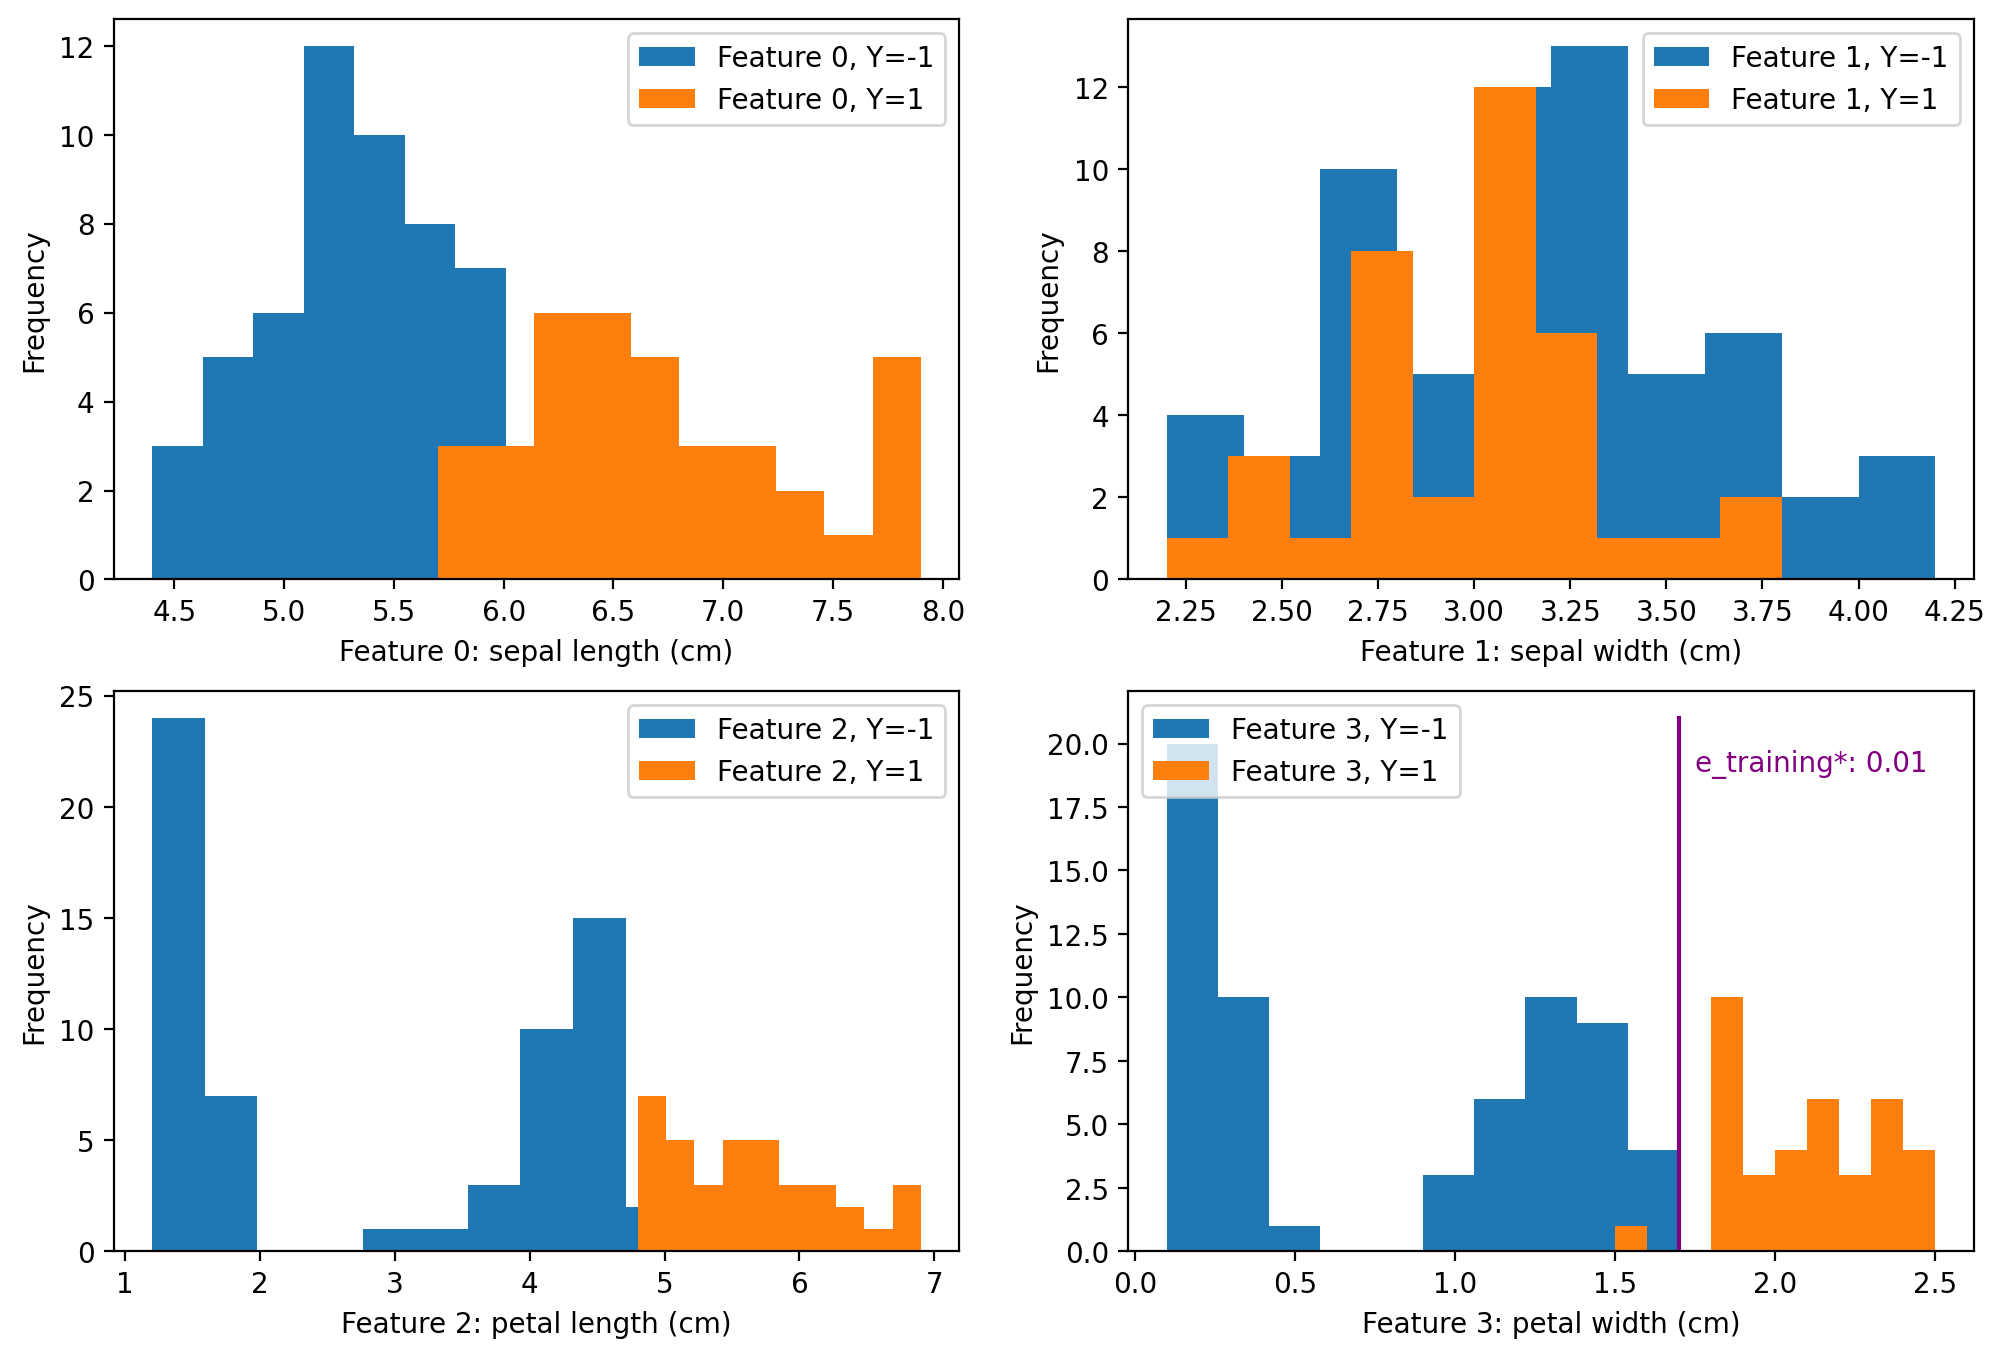

In [6]:
plt.figure(figsize=(12,8))
for j in range(4):
    Xj_train = X_train[:,j]
    Xj_when_Y0_train = [Xj_train[i] for i in range(len(Xj_train)) if Y_train[i] == -1]
    Xj_when_Y1_train = [Xj_train[i] for i in range(len(Xj_train)) if Y_train[i] == 1]

    plt.subplot(2, 2, j+1)
    plt.hist(Xj_when_Y0_train, label='Feature {}, Y=-1'.format(j))
    plt.hist(Xj_when_Y1_train, label='Feature {}, Y=1'.format(j))
    plt.xlabel('Feature {}: {}'.format(j, iris.feature_names[j]))
    plt.ylabel('Frequency')
    plt.legend()
    
    if j == opt_j:
        y_min, y_max = plt.ylim()
        plt.plot([opt_Th, opt_Th], [y_min, y_max], color = 'purple')
        plt.text(opt_Th + 0.05, y_max * 0.9, f'e_training*: {opt_e_training}', color = 'purple')
    
plt.show()